# Language Detection

A language detection model is a model that can detect the language of a given text. This is a very useful model for many applications, such as:
- Language translation
- Language specific text processing
- Language specific text analysis
- Voice recognition
- Virtual assistants

There are many approaches to language detection. In this notebook, we will use a many approaches to detect the language of a given text. We will use the following approaches:

- Approach 1: Using a language detection library
- Approach 2: Using a character n-gram model
- Approach 3: [Using Mutual Information based Distance Measure.](https://www.engati.com/glossary/language-detection#:~:text=and%20Live%20Chat-,How%20language%20detection%20works%3F,strongest%20correlation%20to%20a%20corpus.)
- Approach 4: Using deep learning

## Approach 1: Language Detection library

In [1]:
import langdetect
from langdetect import detect, lang_detect_exception
import langid
import fasttext
import fasttext.util
import iso639 
from iso639 import *

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('../data/Language.csv')

In [4]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
def iso2str(text):
    try:
        return languages.get(alpha2=text).name
    except:
        return 'unknown'

In [6]:
def check_lang(Text):
    try:
        lang = detect(str(Text))
    except lang_detect_exception.LangDetectException:
        lang = 'unknown'
    return lang   

In [7]:
df['langdetect'] = df['Text'].apply(check_lang)

In [8]:
df['langdetect'] = df['langdetect'].apply(iso2str)
df.head()

,Text,Language,langdetect
0,"Nature, in the broadest sense, is the natural...",English,English
1,"""Nature"" can refer to the phenomena of the phy...",English,English
2,"The study of nature is a large, if not the onl...",English,English
3,"Although humans are part of nature, human acti...",English,English
4,[1] The word nature is borrowed from the Old F...,English,English


In [9]:
df['langid'] = df['Text'].apply(langid.classify)
df['langid'] = df['langid'].apply(lambda x: x[0])
df['langid'] = df['langid'].apply(iso2str)
df.head()

,Text,Language,langdetect,langid
0,"Nature, in the broadest sense, is the natural...",English,English,English
1,"""Nature"" can refer to the phenomena of the phy...",English,English,English
2,"The study of nature is a large, if not the onl...",English,English,English
3,"Although humans are part of nature, human acti...",English,English,English
4,[1] The word nature is borrowed from the Old F...,English,English,English


In [10]:
class LanguageIdentification:

    def __init__(self):
        pretrained_lang_model = "../models/lid.bin"
        self.model = fasttext.load_model(pretrained_lang_model)

    def predict_lang(self, text):
        predictions = self.model.predict(text, k=1) 
        predictions = predictions[0][0].replace("__label__", "")
        return predictions

In [11]:
model = LanguageIdentification()

# temporary remove \n from text and replace it with space
df['Text'] = df['Text'].apply(lambda x: x.replace("\n", " "))
df['fasttext'] = df['Text'].apply(model.predict_lang)
df['fasttext'] = df['fasttext'].apply(iso2str)
df.head()


,Text,Language,langdetect,langid,fasttext
0,"Nature, in the broadest sense, is the natural...",English,English,English,English
1,"""Nature"" can refer to the phenomena of the phy...",English,English,English,English
2,"The study of nature is a large, if not the onl...",English,English,English,English
3,"Although humans are part of nature, human acti...",English,English,English,English
4,[1] The word nature is borrowed from the Old F...,English,English,English,English


In [12]:
def multiclass_report(y_true, y_pred, labels):
    print(f'Accuracy: {np.mean(y_true == y_pred)}\nPercision: {np.mean(y_true == y_pred)}\nRecall: {np.mean(y_true == y_pred)}')
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Using Langdetect
Accuracy: 0.7903647092967012
Percision: 0.7903647092967012
Recall: 0.7903647092967012


/tmp/ipykernel_10958/2948825406.py:4: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


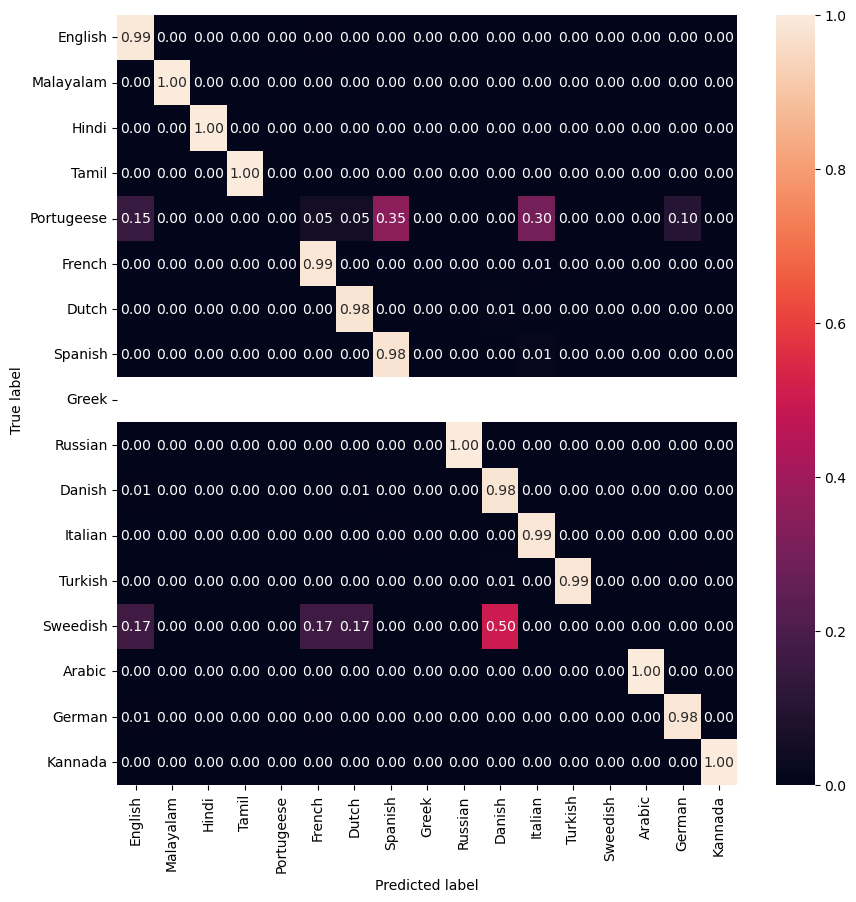

Using Langid
Accuracy: 0.7907516687626971
Percision: 0.7907516687626971
Recall: 0.7907516687626971


/tmp/ipykernel_10958/2948825406.py:4: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


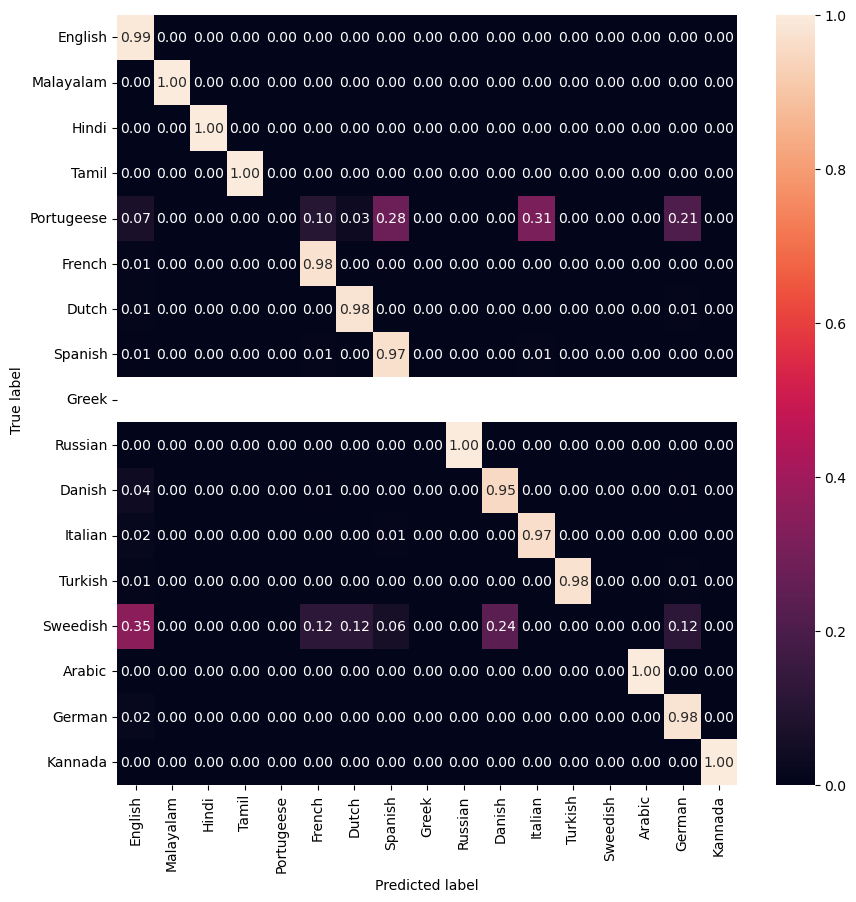

Using Fasttext
Accuracy: 0.8179355712489117
Percision: 0.8179355712489117
Recall: 0.8179355712489117


/tmp/ipykernel_10958/2948825406.py:4: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


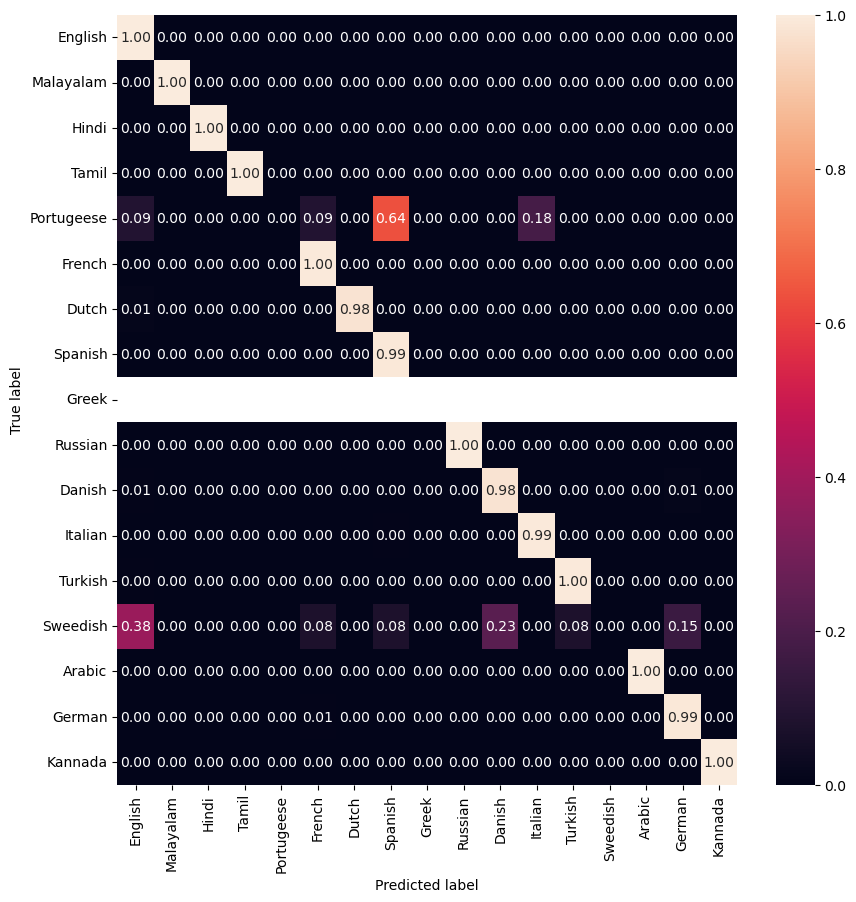

In [13]:
print("Using Langdetect")
multiclass_report(df['Language'], df['langdetect'], df['Language'].unique())
print("Using Langid")
multiclass_report(df['Language'], df['langid'], df['Language'].unique())
print("Using Fasttext")
multiclass_report(df['Language'], df['fasttext'], df['Language'].unique())


In [20]:

def extract_ngrams(text, n):
    ngrams = []
    for i in range(len(text)-n+1):
        ngrams.append(text[i:i+n])
    return ngrams

n = 3

freq_tables = {}
for lang in df['Language'].unique():
    texts = df.loc[df['Language'] == lang, 'Text']
    freq_table = {}
    for text in texts:
        ngrams = extract_ngrams(text, n)
        for ngram in ngrams:
            freq_table[ngram] = freq_table.get(ngram, 0) + 1
    total_ngrams = sum(freq_table.values())
    for ngram in freq_table:
        freq_table[ngram] /= total_ngrams
    freq_tables[lang] = freq_table

predictions = []
for i, text in enumerate(df['Text']):
    ngrams = extract_ngrams(text, n)
    probs = {}
    for lang in freq_tables:
        prob = 1
        for ngram in ngrams:
            prob *= freq_tables[lang].get(ngram, 0)
        probs[lang] = prob
    lang_pred = max(probs, key=probs.get)
    predictions.append(lang_pred)

df['Prediction'] = predictions


Using Ngram
Accuracy: 0.6055915642836412
Percision: 0.6055915642836412
Recall: 0.6055915642836412


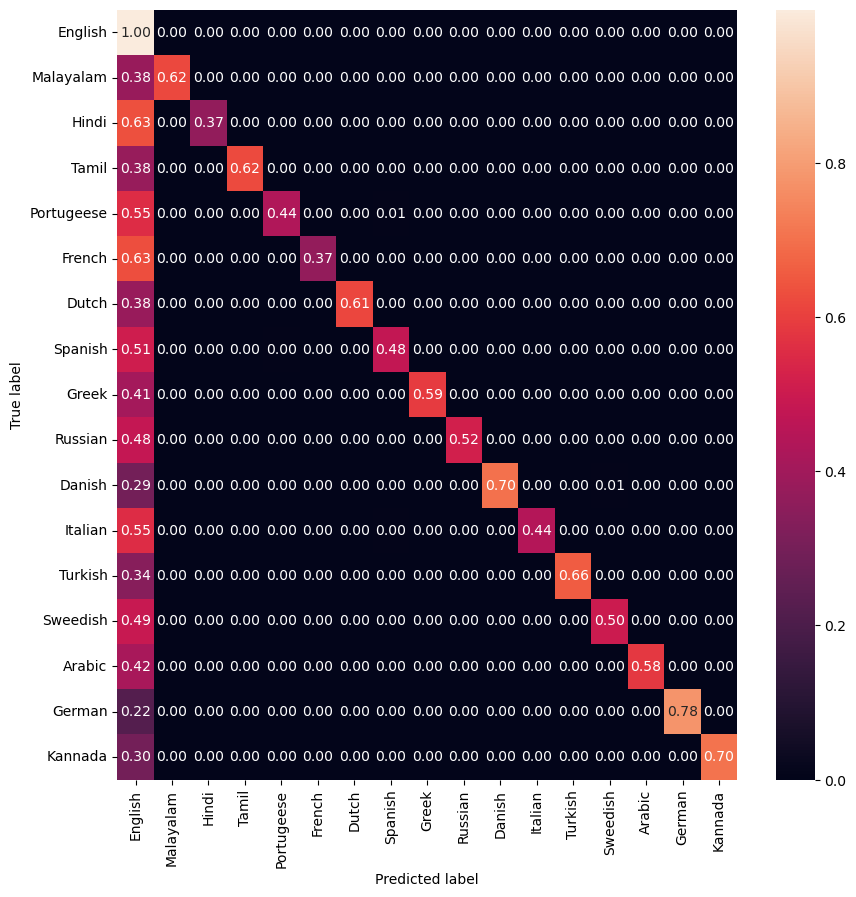

In [23]:
print("Using Ngram")
multiclass_report(df['Language'], df['Prediction'], df['Language'].unique())

In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

In [60]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [61]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['Text'])

train_sequences = tokenizer.texts_to_sequences(train_df['Text'])
train_padded = pad_sequences(train_sequences, maxlen=50, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_df['Text'])
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post', truncating='post')


In [67]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=50),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='multiclass_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 50, 128)           1280000   
                                                                 
 lstm_6 (LSTM)               (None, 50, 64)            49408     
                                                                 
 dropout_34 (Dropout)        (None, 50, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dropout_35 (Dropout)        (None, 16)                0         
                                                                 
 dense_49 (Dense)            (None, 1)               

2023-04-25 15:23:44.212601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 15:23:44.213412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 15:23:44.214435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [69]:
import os

if not os.path.exists('../models/model.h5'):
    model.fit(train_padded, train_df['Language'], epochs=10, validation_data=(test_padded, test_df['Language']))
    model.save('../models/model.h5')
else:
    model = keras.models.load_model('../models/model.h5')

test_loss, test_acc = model.evaluate(test_padded, test_df['Language'])
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

multiclass_report(test_df['Language'], model.predict_classes(test_padded), test_df['Language'].unique())

Epoch 1/10


2023-04-25 15:23:51.291230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 15:23:51.293127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 15:23:51.294442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

ValueError: in user code:

    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/losses.py", line 2653, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/losses.py", line 2600, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "/home/arrry/.anaconda3/lib/python3.10/site-packages/keras/saving/legacy/serialization.py", line 543, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'multiclass_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [70]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

# Load the data from a dataframe

# Convert the language labels to integers
lang_to_int = {lang: i for i, lang in enumerate(df['Language'].unique())}
int_to_lang = {i: lang for lang, i in lang_to_int.items()}
df['Language_ID'] = df['Language'].map(lang_to_int)

# Split the data into training and testing sets
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Text'])
train_sequences = tokenizer.texts_to_sequences(train_df['Text'])
test_sequences = tokenizer.texts_to_sequences(test_df['Text'])

# Pad the sequences
max_length = 100  # set the maximum length of the sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Create the model architecture
vocab_size = len(tokenizer.word_index) + 1  # add 1 for the padding token
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.2

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(lstm_units),
    Dropout(dropout_rate),
    Dense(len(lang_to_int), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(train_padded, train_df['Language_ID'], epochs=epochs, validation_data=(test_padded, test_df['Language_ID']))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padded, test_df['Language_ID'])
print('Test accuracy:', test_acc)

# Save the model
model.save('language_detection_model.h5')  # replace with the name of your desired file


Epoch 1/10


2023-04-25 15:26:31.789441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 15:26:31.790760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 15:26:31.792025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - ETA: 0s - loss: 2.7431 - accuracy: 0.1317

2023-04-25 15:26:53.062494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 15:26:53.064100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 15:26:53.065158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

259/259 [==============================] - 22s 80ms/step - loss: 2.7431 - accuracy: 0.1317 - val_loss: 2.7243 - val_accuracy: 0.1369
Epoch 2/10
259/259 [==============================] - 20s 79ms/step - loss: 2.7220 - accuracy: 0.1366 - val_loss: 2.7200 - val_accuracy: 0.1364
Epoch 3/10
259/259 [==============================] - 23s 89ms/step - loss: 2.7209 - accuracy: 0.1339 - val_loss: 2.7164 - val_accuracy: 0.1369
Epoch 4/10
259/259 [==============================] - 26s 100ms/step - loss: 2.6596 - accuracy: 0.1433 - val_loss: 2.5198 - val_accuracy: 0.1645
Epoch 5/10
259/259 [==============================] - 25s 97ms/step - loss: 2.5335 - accuracy: 0.1574 - val_loss: 2.5061 - val_accuracy: 0.1703
Epoch 6/10
259/259 [==============================] - 23s 90ms/step - loss: 2.5039 - accuracy: 0.1625 - val_loss: 2.4806 - val_accuracy: 0.1616
Epoch 7/10
259/259 [==============================] - 25s 97ms/step - loss: 2.5110 - accuracy: 0.1744 - val_loss: 2.5028 - val_accuracy: 0.1843
Ep